In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Cleaning up Unnecessary Columns



In [4]:
df = df.drop(['channelId', 'video_id','thumbnail_link'], axis=1)

In [5]:
df.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...


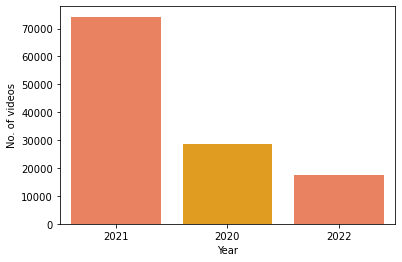

In [6]:
cdf = df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publishedAt": "No_of_videos"})

fig, ax = plt.subplots()
_ = sb.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

## Just using data set of 2021

In [7]:
df = df[df["publishedAt"].str.contains("2020|2022") == False]

## Check if all of the data is currently only consist of 2021

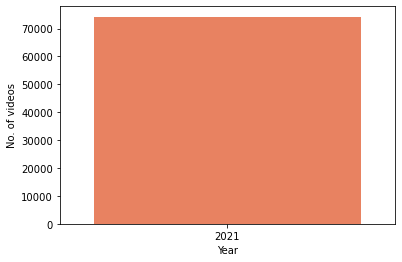

In [8]:
checker = df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publishedAt": "No_of_videos"})

fig, ax = plt.subplots()
_ = sb.barplot(x="year", y="No_of_videos", data=checker, 
        palette=sb.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

#### In the CSV file, we see that there are many entrys that are of same title but on different date, indicating how many days they were trending.
#### Now we need to find the number of days for each 

In [22]:
df['duplicate'] = df.duplicated(subset=['title'], keep='last')


### This removes the duplicate

In [10]:
df.drop_duplicates(subset=['title'])

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,duplicate
27796,"Youtube Rewind 2020, Thank God It's Over",2021-01-01T21:00:03Z,MrBeast,24,2021-01-02T00:00:00Z,[None],17866867,2862697,19927,224811,False,False,This is what Youtube Rewind would look like if...,True
27797,Justin Bieber - Anyone,2021-01-01T05:00:08Z,JustinBieberVEVO,10,2021-01-02T00:00:00Z,Justin|Bieber|Anyone|RBMG/Def|Jam|Pop,11013551,782233,21750,63315,False,False,Anyone out now: https://JustinBieber.lnk.to/An...,True
27798,Jennifer Lopez | New Year's Rockin' Eve Perfor...,2021-01-01T09:00:37Z,Jennifer Lopez,10,2021-01-02T00:00:00Z,[None],2060520,34996,6049,5788,False,False,Jennifer Lopez | New Year's Rockin' Eve Perfor...,True
27799,London's 2021 fireworks 🎆 Happy New Year Live!...,2021-01-01T00:13:16Z,BBC,24,2021-01-02T00:00:00Z,fireworks|NYE|new year countdown 2021|firework...,5478680,85416,9242,16876,False,False,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,True
27802,Welcome to BREATH - A 30 Day Yoga Journey | ...,2021-01-01T06:00:09Z,Yoga With Adriene,26,2021-01-02T00:00:00Z,breath|breath yoga|30 days of yoga|30 day yoga...,884345,34736,508,4669,False,False,It is happening! Today’s video is a bit of an ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102618,Part 1’ #short #ricardofloors #stairs,2021-12-29T10:43:30Z,Ricardofloors,26,2022-01-03T00:00:00Z,[None],1998177,17091,0,248,False,False,NaN,True
102652,Half in the Bag: The Matrix Resurrections,2021-12-31T18:54:30Z,RedLetterMedia,24,2022-01-03T00:00:00Z,redlettermedia|red letter media|red|letter|med...,959346,38635,0,7678,False,False,Mike and Jay take a little break from tracking...,True
102657,I was heart broken,2021-12-31T02:53:18Z,Morgann Book,22,2022-01-03T00:00:00Z,[None],3297362,231671,0,503,False,False,NaN,True
102818,Marshawn Lynch & MANSCAPED™: Beast Mode Lawn M...,2021-12-20T16:23:26Z,MANSCAPED,26,2022-01-04T00:00:00Z,Manscaped|Manscaping|Manscapping|Manscape|groo...,311038,104,0,16,False,False,Mini Marshawn breaks down why you should be us...,True


In [11]:
titles = df['title']
